Chargement des données, séparation et mise à l'échelle...

Lancement de la Grid Search sur k=1 à k=29 avec 10-fold V.C...
Fitting 10 folds for each of 15 candidates, totalling 150 fits

  RÉSULTATS DE L'OPTIMISATION (V.C. 10-fold)
Meilleur k sélectionné (basé sur F1-score V.C.) : 1
Meilleur Score F1 moyen de V.C. : 0.8944
Temps d'exécution total de la recherche : 209.88 secondes


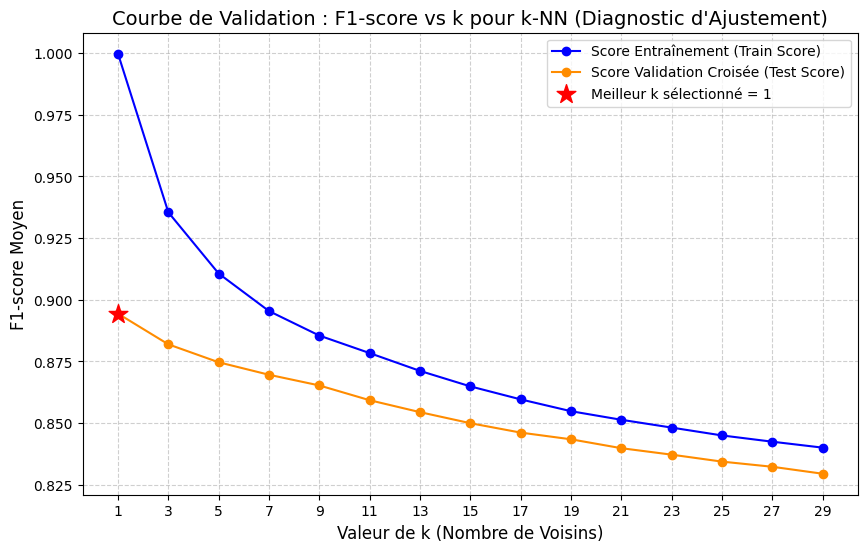

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report)

# --- CONFIGURATION ---
CHEMIN_FICHIER_EQUILIBRE = 'C:\\Users\\hp\\Desktop\\TPs\\DataMining\\preparing\\Final_Reduit30_70.csv'
COLONNE_CIBLE = 'classe'
TEST_SIZE = 0.2
K_FIXE = 5 
# ---------------------

def run_knn_final_evaluation():
    try:
        # 1. Chargement et Préparation des Données
        print("Chargement et préparation des données...")
        df_final = pd.read_csv(CHEMIN_FICHIER_EQUILIBRE)
        
        # On ignore les colonnes géographiques pour l'apprentissage
        X = df_final.drop(columns=[COLONNE_CIBLE, 'latitude', 'longitude'], errors='ignore') 
        y = df_final[COLONNE_CIBLE] 

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=TEST_SIZE, random_state=42, stratify=y
        )
        
        # Mise à l'échelle (Crucial pour k-NN)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 2. Entraînement du modèle avec k=5
        print(f"Entraînement du modèle k-NN avec k={K_FIXE}...")
        knn = KNeighborsClassifier(n_neighbors=K_FIXE, n_jobs=-1)
        knn.fit(X_train_scaled, y_train)

        # 3. Prédictions
        y_pred = knn.predict(X_test_scaled)
        y_proba = knn.predict_proba(X_test_scaled)[:, 1] # Probabilités pour la courbe ROC

        # 4. Calcul des métriques
        print("\n" + "="*50)
        print(f" RÉSULTATS DE L'ÉVALUATION (k={K_FIXE})")
        print("="*50)
        print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
        print(f"Précision : {precision_score(y_test, y_pred):.4f}")
        print(f"Rappel    : {recall_score(y_test, y_pred):.4f}")
        print(f"F1-Score  : {f1_score(y_test, y_pred):.4f}")
        print("\nClassification Report :")
        print(classification_report(y_test, y_pred))

# --- 5. VISUALISATIONS SÉPARÉES ---

        # A. Matrice de Confusion (Figure 1)
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Feu", "Feu"])
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Matrice de Confusion - k-NN (k={K_FIXE})')
        plt.show()

        # B. Courbe ROC (Figure 2)
        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Taux de Faux Positifs (FPR)')
        plt.ylabel('Taux de Vrais Positifs (TPR)')
        plt.title('Courbe ROC (Receiver Operating Characteristic) - k-NN')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()
    except Exception as e:
        print(f"❌ Erreur : {e}")

# Lancer l'évaluation
run_knn_final_evaluation()